<h1>Introductory examples</h1>
<h2>1.usa.gov data from bit.ly</h2>

In [8]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [9]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [10]:
records[0]['tz']

'America/New_York'

<h3>Counting time zones in pure Python</h3>

In [11]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [12]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [13]:
from collections import defaultdict

def get_counts(sequence):
    counts = defaultdict(int)  # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

In [16]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [17]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

<h3>Counting time zones with pandas</h3>

In [18]:
from pandas import DataFrame, Series

In [19]:
import pandas as pd

In [20]:
frame = DataFrame(records)

In [21]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [22]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [23]:
tz_counts = frame['tz'].value_counts()

In [24]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [25]:
clean_tz = frame['tz'].fillna('Missing')

In [26]:
clean_tz[clean_tz == ''] = 'Unknown'

In [27]:
tz_counts = clean_tz.value_counts()

In [28]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


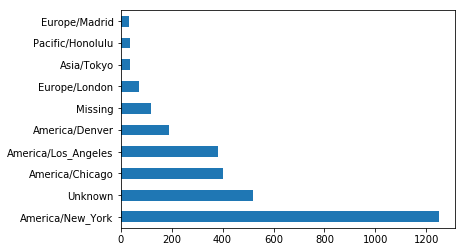

In [31]:
tz_counts[:10].plot(kind='barh', rot=0)

In [36]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [37]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [38]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [39]:
cframe = frame[frame.a.notnull()]

In [42]:
import numpy as np
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [43]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [44]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [47]:
by_tz_os

In [48]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [49]:
by_tz_os.size().unstack()

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,NaN
America/Argentina/Cordoba,NaN,1.0


In [56]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [57]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [58]:
indexer = agg_counts.sum(1)

In [71]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [60]:
indexer = agg_counts.sum(1).argsort()

In [69]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [64]:
count_subset = agg_counts.take(indexer)[-10:]

In [65]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


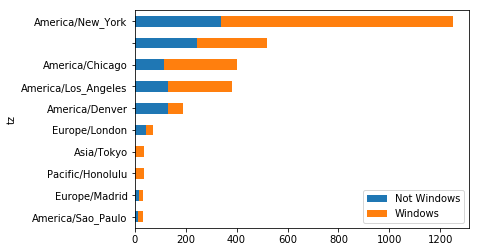

In [66]:
count_subset.plot(kind='barh', stacked=True)

In [67]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

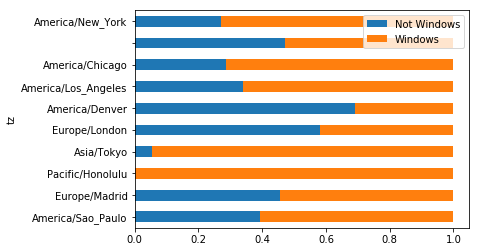

In [68]:
normed_subset.plot(kind='barh', stacked=True)

<h2>MovieLens 1M data set</h2>

In [4]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [5]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [13]:
mean_ratings = data.pivot_table(values ='rating', index='title', columns='gender', aggfunc='mean')

In [14]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [15]:
ratings_by_title = data.groupby('title').size()

In [16]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [18]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [20]:
mean_ratings = mean_ratings.loc[active_titles]

In [21]:
mean_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 'burbs, The (1989) to eXistenZ (1999)
Data columns (total 2 columns):
F    1216 non-null float64
M    1216 non-null float64
dtypes: float64(2)
memory usage: 68.5+ KB


In [23]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [24]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


<h3>Measuring rating disagreement</h3>

In [25]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [27]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [28]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [29]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [30]:
ratings_std_by_title = data.groupby('title')['rating'].std()

In [35]:
ratings_std_by_title = ratings_std_by_title.loc[active_titles]

In [37]:
ratings_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

<h2>US Baby Names 1880-2010</h2>

In [5]:
import pandas as pd

In [6]:
names1880 = pd.read_csv('ch02/babynames/yob1880.txt', names=['name', 'sex', 'births'])

In [7]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [8]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [9]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/babynames/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [11]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)

In [12]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


Populating the interactive namespace from numpy and matplotlib


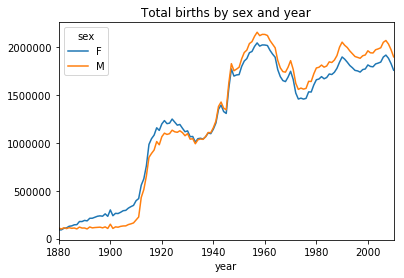

In [13]:
%pylab inline
total_births.plot(title='Total births by sex and year')

In [14]:
def add_prop(group):
    # Integer division floors
    births = group.births
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [15]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


In [16]:
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [17]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [18]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [19]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261877 entries, (1880, F, 0) to (2010, M, 1677645)
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ MB


<h3>Analyzing Naming Trends</h3>

In [20]:
boys = top1000[top1000.sex == 'M' ]
girls = top1000[top1000.sex == 'F']

In [28]:
total_births = top1000.pivot_table(values='births', index='year', columns='name', aggfunc=sum)
total_births.info()

C:\Users\yakov\Miniconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E532B07D30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002E50018FF28>], dtype=object)

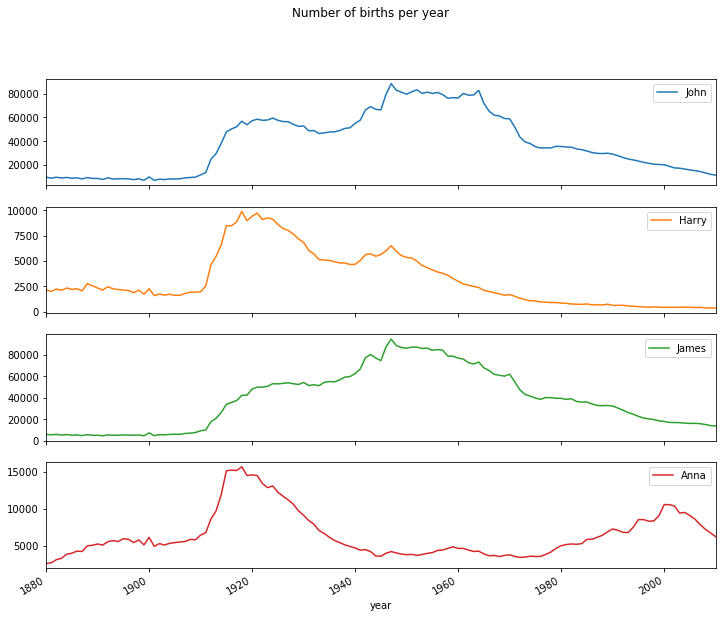

In [29]:
subset = total_births[['John', 'Harry', 'James', 'Anna']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

In [30]:
table = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)

C:\Users\yakov\Miniconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\yakov\Miniconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


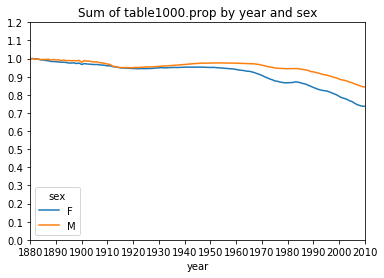

In [32]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [40]:
df = boys[boys.year == 2010]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (2010, M, 1676644) to (2010, M, 1677645)
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [42]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [43]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [44]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [45]:
df = boys[boys.year == 1900]

In [46]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [47]:
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [52]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

C:\Users\yakov\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\yakov\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


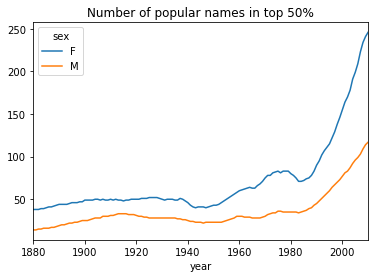

In [53]:
diversity.plot(title='Number of popular names in top 50%')

In [57]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters[:5]

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [68]:
last_letters.name = 'last_letter asdf'
table = names.pivot_table(values='births', index=last_letters,
columns=['sex', 'year'], aggfunc=sum)
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, a to z
Columns: 262 entries, (F, 1880) to (M, 2010)
dtypes: float64(262)
memory usage: 53.4+ KB


In [69]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [70]:
subtable.head()

sex                      F                            M                    
year                  1910      1960      2010     1910      1960      2010
last_letter asdf                                                           
a                 108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                      NaN     694.0     450.0    411.0    3912.0   38859.0
c                      5.0      49.0     946.0    482.0   15476.0   23125.0
d                   6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e                 133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [71]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [72]:
letter_prop = subtable/subtable.sum()

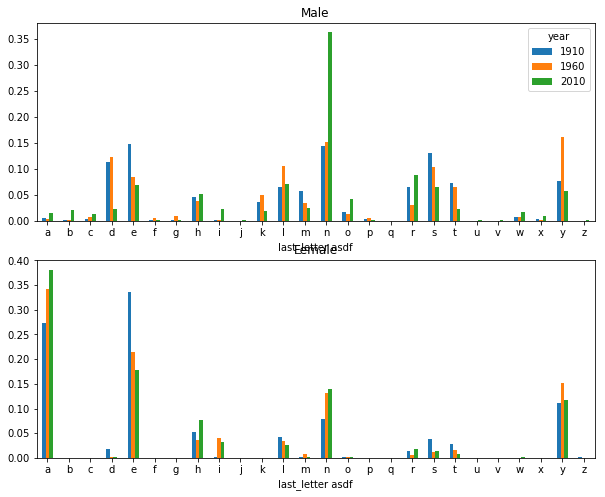

In [73]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
legend=False)

In [74]:
letter_prop = table / table.sum()

In [75]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [76]:
dny_ts.head()

last_letter asdf,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


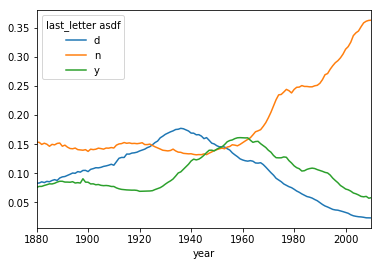

In [77]:
dny_ts.plot()

In [84]:
all_names = top1000.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Yousef', 'Joziah', 'Maxton'], dtype=object)

In [85]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [86]:
lesley_like = all_names[mask]

In [87]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [88]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [89]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [101]:
table = filtered.pivot_table(values='births', index='year', columns='sex', aggfunc='sum')

C:\Users\yakov\Miniconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\yakov\Miniconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [104]:
table = table.div(table.sum(1), axis=0)

In [105]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


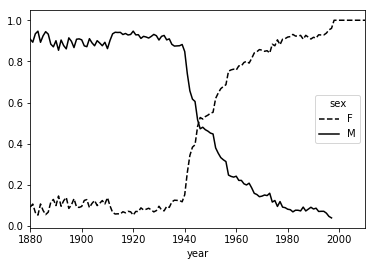

In [106]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [107]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 2 columns):
F    131 non-null float64
M    118 non-null float64
dtypes: float64(2)
memory usage: 3.1 KB


In [108]:
table[:5]

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
